<a href="https://colab.research.google.com/github/poojashreeNS/Dimensionality_Reduction/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 86 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 8.2 MB/s 
     |████████████████████████████████| 15.8 MB 577 bytes/s 
     |████████████████████████████████| 76 kB 5.5 MB/s 
     |████████████████████████████████| 132 kB 57.9 MB/s 
     |████████████████████████████████| 793 kB 42.3 MB/s 
     |████████████████████████████████| 793 kB 60.5 MB/s 
     |████████████████████████████████| 791 kB 34.6 MB/s 
     |████████████████████████████████| 786 kB 60.1 MB/s 
     |████████████████████████████████| 779 kB 62.0 MB/s 
     |████████████████████████████████| 778 kB 63.3 MB/s 
     |████████████████████████████████| 776 kB 61.1 MB/s 
     |████████████████████████████████| 769 kB 59.8 MB/s 
     |████████████████████████████████| 766 kB 63.7 MB/s 
     |████████████████████████████████| 1.0 MB 62.5 MB/s 
     |████████████████████████████████| 722 kB 53.0 MB/s 
     |████████████████████████████████| 722 kB 61.2 MB/s 
     |██████████

In [5]:
#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
#LLE
from sklearn.manifold import LocallyLinearEmbedding as LLE
#Isomap
from sklearn.manifold import Isomap
#SVD
from sklearn.decomposition import TruncatedSVD

In [7]:
train = pd.read_csv('/content/sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131.0,134.0,144.0,147.0,125.0,87.0,87.0,103.0,107.0,110.0,116.0,113.0,75.0,74.0,74.0,74.0,76.0,74.0,82.0,134.0,168.0,155.0,146.0,137.0,145.0,146.0,149.0,135.0,124.0,125.0,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114.0,112.0,89.0,48.0,133.0,194.0,182.0,185.0,184.0,184.0,182.0,181.0,172.0,174.0,177.0,178.0,178.0,179.0,181.0,183.0,187.0,175.0,165.0,154.0,118.0,107.0,100.0,75.0,96.0,83.0,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145.0,123.0,78.0,162.0,239.0,227.0,229.0,226.0,226.0,225.0,224.0,222.0,89.0,91.0,94.0,111.0,136.0,154.0,167.0,184.0,125.0,3.0,166.0,225.0,195.0,188.0,172.0,185.0,161.0,122.0,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85.0,80.0,84.0,151.0,238.0,255.0,255.0,250.0,237.0,245.0,250.0,232.0,103.0,101.0,102.0,103.0,95.0,208.0,231.0,227.0,209.0,190.0,179.0,182.0,152.0,150.0,159.0,119.0,83.0,63.0,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93.0,52.0,24.0,53.0,63.0,33.0,41.0,51.0,48.0,45.0,49.0,55.0,149.0,150.0,150.0,148.0,147.0,151.0,124.0,82.0,84.0,81.0,69.0,81.0,111.0,103.0,84.0,75.0,53.0,28.0,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


# **Dimensionality Reduction on Tabular dataset**

### **Plot functions**

In [91]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=10,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [92]:
def plot_3d(component1,component2,component3):

  fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=5,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
  # tight layout
  fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
  fig.layout.template = 'plotly_dark'
    
  fig.show()

### **Standardizing** **dataset**

In [8]:
#picking only the first 10 labels
train = train[train['label'] < 10]
# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values

fig = go.Figure(data=go.Scatter(x=train.loc[:,'pixel1':].values,
                                y=train.loc[:,'label'].values,
                                mode='markers',
                                marker_color=y,
                                text=train.loc[:,'pixel1':].values)) # hover text goes here

fig.update_layout(title='Pixel dataset Visualization')
fig.layout.template = 'plotly_dark'
fig.show()

In [10]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
x = StandardScaler().fit_transform(x)

### **Implementing PCA**

In [96]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

Duration: 0.32828688621520996 seconds


PCA_2D

In [97]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

PCA_3D

In [98]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

### **Implementing t-SNE**

In [99]:
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 34.624735832214355 seconds


t-SNE_2D

In [100]:
plot_2d(tsne[:, 0],tsne[:, 1])

t-SNE_3D

In [101]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

### **Implementation of UMAP**

In [ ]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

UMAP_2D

In [ ]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

UMAP_3D

In [ ]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

### **Implementation of LLE**

In [14]:
def run_lle(num_neighbors, dims, mthd, data):
    # Specify LLE parameters
    embed_lle = LLE(n_neighbors=num_neighbors,
                    n_components=dims, 
                    reg=0.001,
                    eigen_solver='auto',
                    method=mthd, 
                    modified_tol=1e-12,
                    neighbors_algorithm='auto',
                    random_state=42,
                    n_jobs=-1
                   )
    # Fit and transofrm the data
    result = embed_lle.fit_transform(data)
    
    # Return results
    return result

LLE_2D

In [15]:
std_lle_res=run_lle(num_neighbors=30, dims=2, mthd='standard', data=x)
plot_2d(std_lle_res[:, 0],std_lle_res[:, 1] )

LLE_3D

In [16]:
std_lle_res=run_lle(num_neighbors=30, dims=3, mthd='modified', data=x)
plot_3d(std_lle_res[:, 0], std_lle_res[:, 1], std_lle_res[:, 2])

### **Implementation of Isomap**

In [11]:
def run_isomap(num_neighbors, dims, data):
    # Specify Isomap parameters
    embed_isomap = Isomap(n_neighbors=num_neighbors, n_components=dims, n_jobs=-1)
    
    # Fit and transofrm the data
    result = embed_isomap.fit_transform(data)
    
    # Return results
    return result    

Isomap_2D

In [12]:
isomap_res=run_isomap(num_neighbors=30, dims=2, data=x)
plot_2d(isomap_res[:, 0], isomap_res[:, 1])

Isomap_3D

In [13]:
isomap_res=run_isomap(num_neighbors=30, dims=3, data=x)
plot_3d(isomap_res[:,0], isomap_res[:, 1], isomap_res[:, 2])

### **Implementation of SVD**

In [ ]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(x)
plot_2d(X_reduced[:, 0], X_reduced[:, 1])

In [ ]:
svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(x)
plot_3d(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])

# **Dimensionality Reduction on Image dataset**

Prepare Dataset

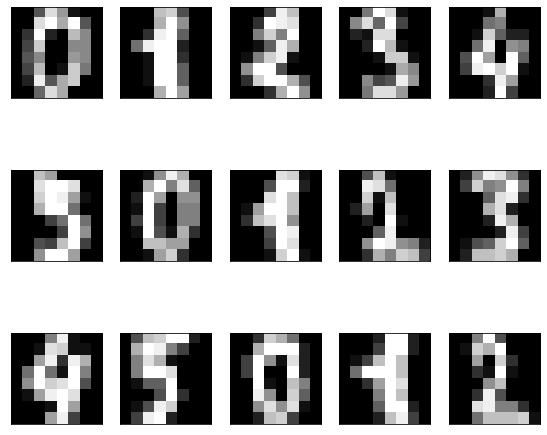

In [12]:
#from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_digits
#faces = fetch_lfw_people(min_faces_per_person = 100)
faces = load_digits(n_class=6)

def plot_gallery(images, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray) #.reshape((62, 47))
        plt.xticks(())
        plt.yticks(())

#plot_gallery(faces.images)
plot_gallery(faces.images)

### **Plot function**

In [13]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap, zoom=1.05),
                                      proj[i])
            ax.add_artist(imagebox)

### **PCA**

Duration: 0.5541932582855225 seconds


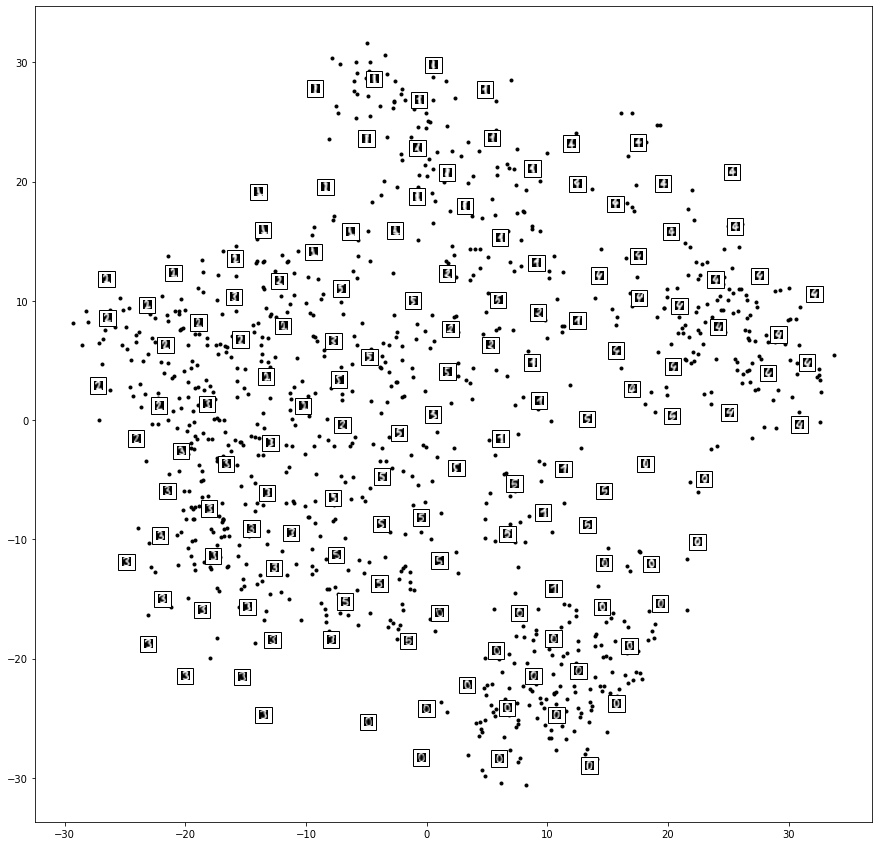

In [14]:
start = time.time()
fig, ax = plt.subplots(figsize=(15, 15))
plot_components(faces.data,
                model=PCA(n_components=2),
                images=faces.images[::, ::1, ::1])
print('Duration: {} seconds'.format(time.time() - start))

### **SVD**

Duration: 0.13942337036132812 seconds


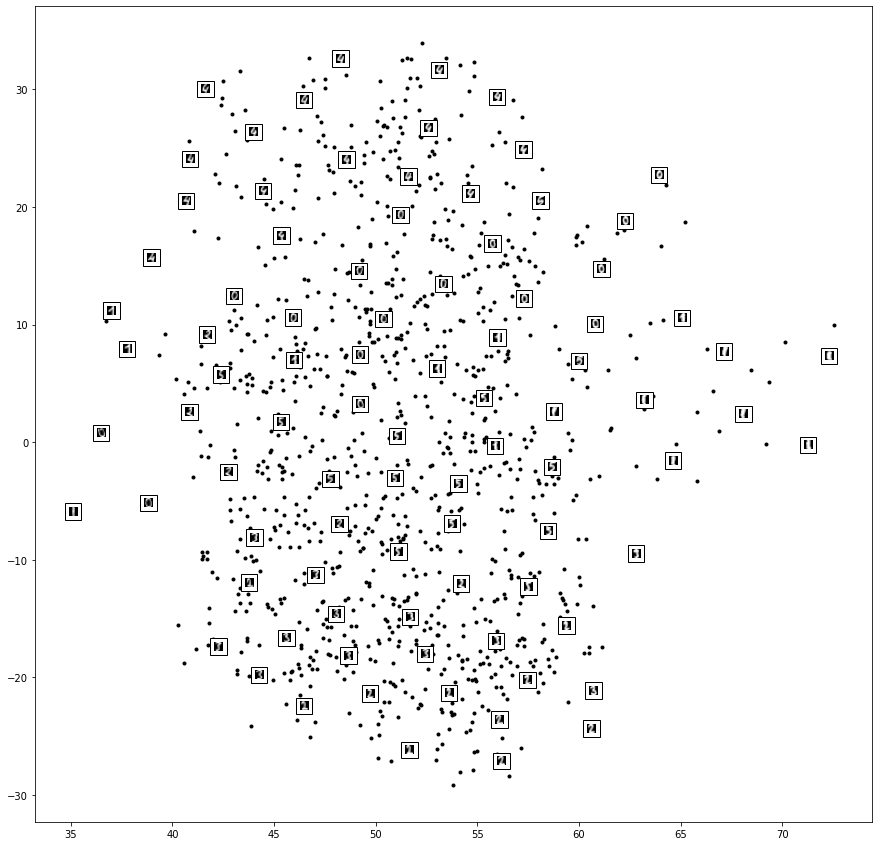

In [115]:
start = time.time()
fig, ax = plt.subplots(figsize=(15, 15))
plot_components(faces.data,
                model=TruncatedSVD(n_components=2),
                images=faces.images[:, ::1, ::1])
print('Duration: {} seconds'.format(time.time() - start))

### **LLE**

Duration: 0.34514689445495605 seconds


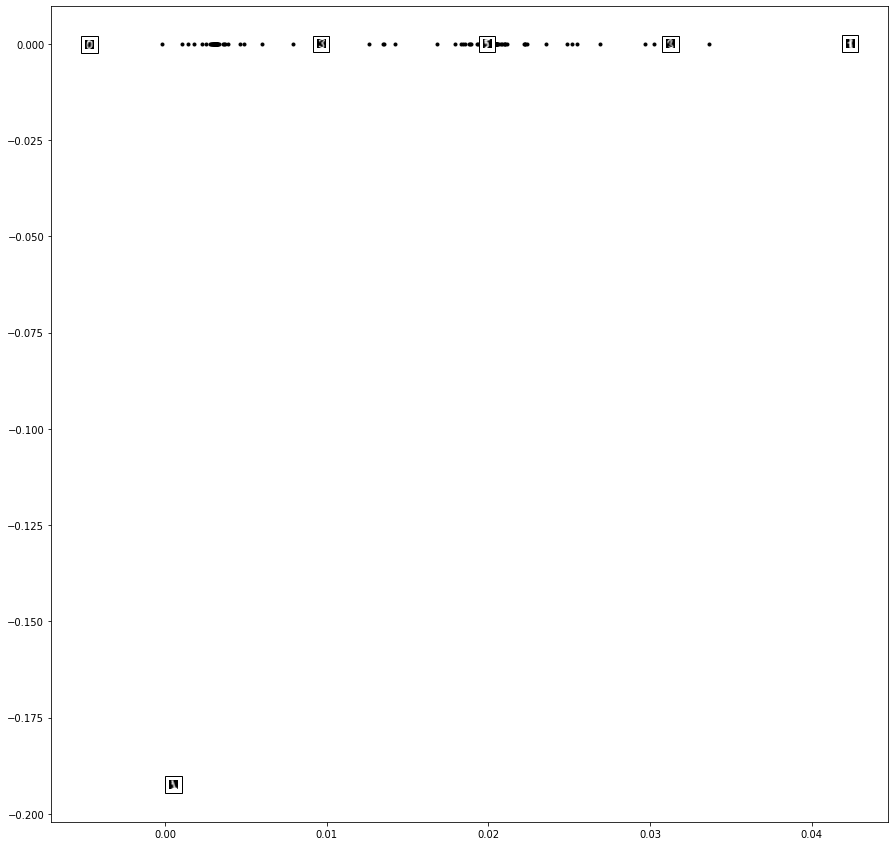

In [116]:
start = time.time()
fig, ax = plt.subplots(figsize=(15, 15))
plot_components(faces.data,
                model=LLE(n_components=2),
                images=faces.images[:, ::1, ::1])
print('Duration: {} seconds'.format(time.time() - start))

### **t-SNE**

Duration: 7.292006254196167 seconds


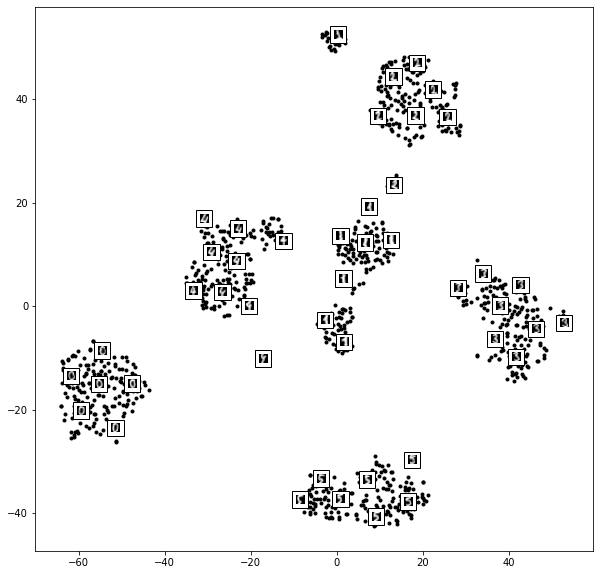

In [117]:
start = time.time()
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=TSNE(n_components=2),
                images=faces.images[:, ::1, ::1])
print('Duration: {} seconds'.format(time.time() - start))

### **ISOMap**

Duration: 0.908836841583252 seconds


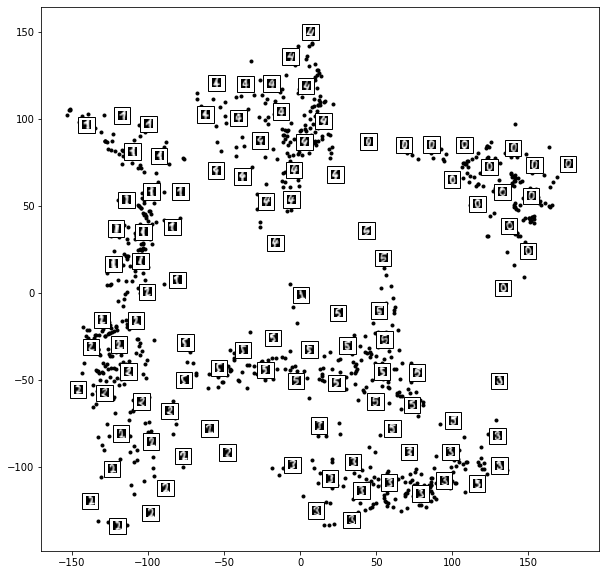

In [118]:
start = time.time()
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::1, ::1])
print('Duration: {} seconds'.format(time.time() - start))

### **UMap**

Duration: 6.462710380554199 seconds


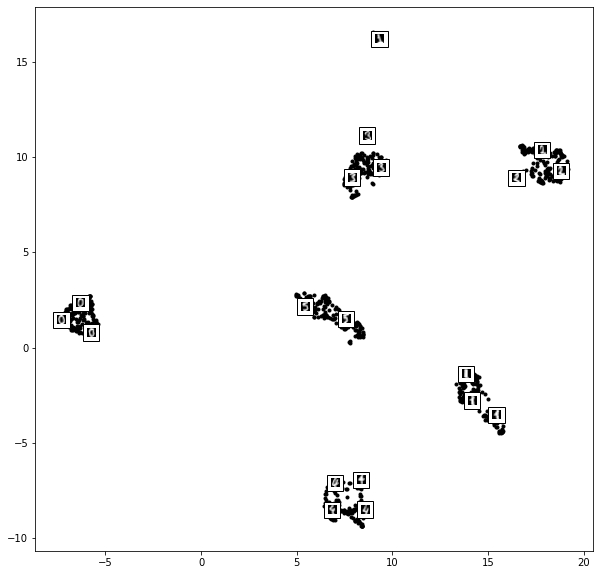

In [119]:
start = time.time()
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=umap.UMAP(n_components=2),
                images=faces.images[:, ::1, ::1])
print('Duration: {} seconds'.format(time.time() - start))